# Data Aggregation

In [1]:
import numpy as np
import pandas as pd

The last stage of data manipulation is data aggregation. For data aggregation you generally mean a
transformation that produces a single integer from an array. In fact, you have already made many operations
of data aggregation, for example, when we calculated the sum(), mean(), count(). In fact, these functions
operate on a set of data and shall perform a calculation with a consistent result consisting of a single value.
However, a more formal manner and the one with more control in data aggregation is that which includes
the categorization of a set.

## GroupBy

So in its pattern of operation you may
conceive this process as divided into three different phases expressed precisely by three operations:
- splitting: division into groups of datasets
- applying: application of a function on each group
- combining: combination of all the results obtained by different groups

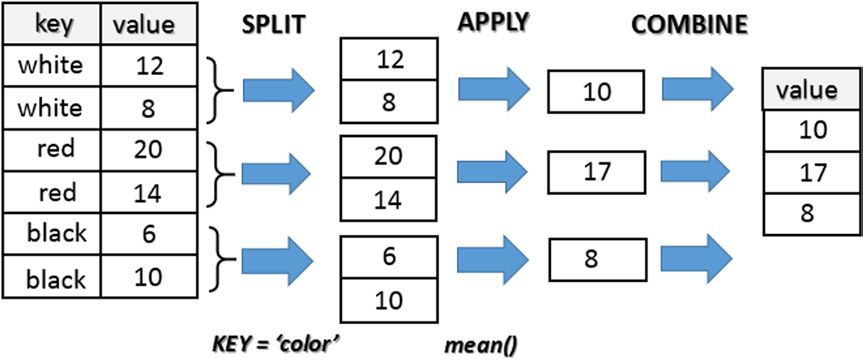

## A Practical Example

In [2]:
frame = pd.DataFrame({'color' : ['white','red','green','red','green'],
                      'object' : ['pen','pencil','pencil','ashtray','pen'],
                      'price1' : [5.56,4.20,1.30,0.56,2.75],
                      'price2' : [4.75,4.12,1.60,0.75,3.15]})

In [3]:
frame

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [6]:
group = frame['price1'].groupby(frame['color'])
group

In [7]:
group.groups

{'green': Int64Index([2, 4], dtype='int64'),
 'red': Int64Index([1, 3], dtype='int64'),
 'white': Int64Index([0], dtype='int64')}

In [9]:
group.mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [10]:
group.sum()

color
green    4.05
red      4.76
white    5.56
Name: price1, dtype: float64

In [16]:
frame['price2'].groupby(frame['color']).sum()

color
green    4.75
red      4.87
white    4.75
Name: price2, dtype: float64

---

# Group Iteration

In [13]:
for name, group in frame.groupby('color'):
    print(name)
    print(group)

green
   color  object  price1  price2
2  green  pencil    1.30    1.60
4  green     pen    2.75    3.15
red
  color   object  price1  price2
1   red   pencil    4.20    4.12
3   red  ashtray    0.56    0.75
white
   color object  price1  price2
0  white    pen    5.56    4.75


## Chain of Transformations

In [19]:
result1 = frame['price1'].groupby(frame['color']).mean()

In [20]:
type(result1)

pandas.core.series.Series

In [22]:
result2 = frame.groupby('color').mean()
result2

,price1,price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


In [23]:
type(result2)

pandas.core.frame.DataFrame

Possible ways of doing data aggregation with groupby:

In [24]:
frame['price1'].groupby(frame['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [25]:
frame.groupby('color')['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [29]:
frame.groupby('color').mean()['price1']

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [30]:
frame.groupby('color').mean().add_prefix('mean_')

,mean_price1,mean_price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


## Functions on Groups

In [31]:
frame.groupby('color').quantile(0.6)

0.6,price1,price2
color,,
green,2.170,2.530
red,2.744,2.772
white,5.560,4.750


In [33]:
def range(series):
    return series.max() - series.min()

In [34]:
group = frame.groupby('color')

In [35]:
group.agg(range)

,price1,price2
color,,
green,1.45,1.55
red,3.64,3.37
white,0.00,0.00


In [37]:
group.agg(['mean', 'std', range])['price1']

,mean,std,range
color,,,
green,2.025,1.025305,1.45
red,2.380,2.573869,3.64
white,5.560,NaN,0.00


---

# Advanced Data Aggregation

In [38]:
frame = pd.DataFrame({'color':['white','red','green','red','green'],
                      'price1':[5.56,4.20,1.30,0.56,2.75],
                      'price2':[4.75,4.12,1.60,0.75,3.15]})

In [39]:
frame

,color,price1,price2
0,white,5.56,4.75
1,red,4.20,4.12
2,green,1.30,1.60
3,red,0.56,0.75
4,green,2.75,3.15


In [40]:
sums = frame.groupby('color').sum().add_prefix('tot_')

In [41]:
sums

,tot_price1,tot_price2
color,,
green,4.05,4.75
red,4.76,4.87
white,5.56,4.75


In [42]:
pd.merge(frame, sums, left_on='color', right_index=True)

,color,price1,price2,tot_price1,tot_price2
0,white,5.56,4.75,5.56,4.75
1,red,4.20,4.12,4.76,4.87
3,red,0.56,0.75,4.76,4.87
2,green,1.30,1.60,4.05,4.75
4,green,2.75,3.15,4.05,4.75


In [43]:
frame.groupby('color').transform(np.sum).add_prefix('tot_')

,tot_price1,tot_price2
0,5.56,4.75
1,4.76,4.87
2,4.05,4.75
3,4.76,4.87
4,4.05,4.75


As you can see the transform() method is a more specialized function that has very specific
requirements: the function passed as an argument must produce a single scalar value (aggregation) to be
broadcasted.

In [46]:
frame = pd.DataFrame({'color':['white','black','white','white','black','black'],
                   'status':['up','up','down','down','down','up'],
                   'value1':[12.33,14.55,22.34,27.84,23.40,18.33],
                   'value2':[11.23,31.80,29.99,31.18,18.25,22.44]})

In [47]:
frame

,color,status,value1,value2
0,white,up,12.33,11.23
1,black,up,14.55,31.80
2,white,down,22.34,29.99
3,white,down,27.84,31.18
4,black,down,23.40,18.25
5,black,up,18.33,22.44


In [48]:
frame.groupby(['color', 'status']).apply(lambda x: x.max())

color status  value1  value2
color status                              
black down    black   down   23.40   18.25
      up      black     up   18.33   31.80
white down    white   down   27.84   31.18
      up      white     up   12.33   11.23

---

# Important Points

- obj.groupby():
    - SAC: split-apply-combine
    - obj is a dataframe with key, or keys
    - parameter: column label or list of column labels
    - return groupby object
    - need to do aggregation after it
    - mean():
        - obj.groupby('keys').mean()
- different ways of interaction with groupby:
    - obj.groupby('column_label').mean()
    - obj['column_label'].groupby(obj['key']).mean() -- return Series
    - obj.groupby('keys').mean()['column_label']
- obj.groupby('keys').agg(function).add_prefix('prefix_')
- obj.groupby('keys').agg(list_of_function)
- obj.groupby('keys').transform(function)
    - no column keys in here
- obj.groupby('keys').apply(function)    